# Assignment 2

In [6]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from bokeh.models import ColumnDataSource , FactorRange, Legend
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.palettes import Category20

## Data load

The csv file of data is loaded and it contains 2,160,953 rows and 39 columns where 4 of them are added to the data as shown below.

In [5]:
#Load data and add columns Year, Month, Hour and Minute
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data[['Hour','Minute']]=data['Time'].str.split(':',expand=True,)
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,"Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,Month,Hour,Minute
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,02,00
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,2.0,NaN,NaN,NaN,NaN,32.0,2013,3,09,21
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,2.0,NaN,NaN,3.0,NaN,NaN,2013,10,19,30
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,1.0,NaN,NaN,NaN,NaN,49.0,2004,8,22,47
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,2.0,NaN,NaN,NaN,NaN,66.0,2005,7,21,00


## Part 1: Questions to text and lectures

### Part 1A: Questions to the Segal and Heer paper

**What is the Oxford English Dictionary's defintion of a narrative?**

<br> "An account of a series of events, facts, etc., given in order and with the establishing of
connections between them." In other words a sequence of events that are causally related. Stories with a narrative structure often have a beginning with an introduction to the situation, a middle with a series of events that involve tension or conflict and an end with a resoluion.

**What is your favorite visualization among the examples in section 3? Explain why in a few words.**

<br> Our favorite visualization among the examples in section 3 is the budget forecast.
As opposed to the Barry Bonds poster-like article from the New York Times, the budget forecast has very simple expression and does not overwhelm the reader with too much information at once. The reader has the opportunity to get more information in their own pace and can click through the different slides through the progress bar. The consistent visual platform maintains the simplicty throughout all the slides and prevents the reader from getting disoriented. Although, the budget forecast looks very simple, it has many cool interactive effects for instance the details-on-demand where additional statistics can be found by mousing-over the chart. Additionally, more information can be found through the multi-messaging consisting of text, annotations and graphic elements which is a nice way of delivering key information. We like the martini glass structure that follows a tight narrative path early on and then opens up later for free exploration. This gives the reader the opportunity to get more information in their own pace and we think that it works very well with the simple design that the forecast budget provides.

**What's the point of Figure 7?**

<br> The point is to categorize each visualization from online journalism, business and visualization research into genre, visual narrative tactics and narrative structure tactics. The design space analysis highlights the many different designs and techniques there is for telling stories with data graphics. The figure also shows the similarities and differences across the different types of visualizations. The difference in how the visualizations guide the viewer through the content is pointed out (1) where user directed path and linear is the two dominating orderings. Furthermore, it shows that the same interaction techniques are used across the visualizations (2) where hover-highligting, filtering, limited interaction and explicit interaction is popular among all types of visualizations. Finally, it shows the underutilization of common narrative interactivity and messaging techniques where tacit tutorial, simulating default views (3) and repition of key information, introductory text and summeries (4) are less frequently used particularly in interactive graphs for the last mentioned. This analysis can help understand what works well when telling stories with data graphics and what can help the visualizations look more like stories and less like data tools. Another interesting point derived from the figure is that the techniques used from visual narrative tactics and narrative structure tactics is independent of genre. This means that all the visualizations within one genre will not necessarily use the same techniques.

**Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).**

<br> Looking at Figure 7 it can be assessed that the most common design choice within each category of both Visual narrative and Narrative structure is:

**For Visual Narrative:**
* Visual Structuring: Consistent Visual Platform
* Highlighting: Feature Distinction
* Transition Guidance: Obejct Continuity

**Narrative Structure:**
* Ordering: User Directed Path
* Interactivity: Filtering / Selection / Search
* Messaging: Captions / Headlines

**Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?**

<br>Our favorite genre of the narrative visualizations is the slide show as it presents the visualization in a simple format but can be extended in complexity by adding interactive features and annotated charts like the budget forecast example. With the slide show the reader can get key information at the right time and at their own pace if designed well by the author.
<br> Our least favorite genre is the Magazine Style as it can often be overwhelming and less interesting for the reader to get all the information mainly through text. Furthermore, the interactive features are limited within this genre compared to the others as more views with different features cannot be created with one Magazine Styled page.

### Part 1B: Question to Sunes talk

**What are the three key elements to keep in mind when you design an explanatory visualization?** <br>

The first key element is *Start with a question*. Here it is important to know what we want to communicate and what we want the audience to take away from the visualization. The second key element is *Allow exploration*. Here we want to give the user the opportunity to investigate. This can be done by making the visualizations interactive which will engage the auidence more. The third key element is *Know your readers*. Here it is important to know the readers starting point and their needs in order to customize the visulizations accordingly.

**Find a visualization that follows the principles (1) overview first, (2) zoom and filter, (3) details on demand and explain how it does achieves (1)-(3)?**

A visualization of covid-19 data that follows the three principles can be seen below.

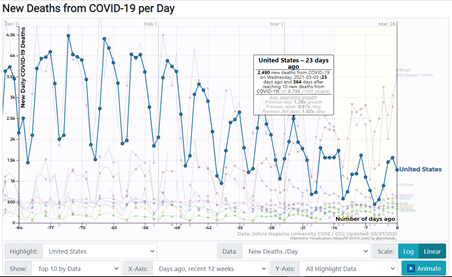

1) Overview: The data gives a nice overview of how new deaths from covid-19 has changed in the last 12-weeks. There is also an amination bottom so the visualization can be viewed as a video. <br>
2) Zoom and filter: In the bottom of the page there is an option to change what data can be seen, how recently the data is from and which countries. <br>
3) Details on Demand: When mousing-over a point the detailed information about the point can be seen such as how many days ago the deaths in a specific country occured. 

URL for the data: https://91-divoc.com/pages/covid-visualization/

**How is explanatory data analysis different from exploratory data analysis?**


The exploratory data analysis focuses on getting familiar with the data by perfoming initial investigations of the data to discover patterns and test hypothesis. On the other hand, explanatory data analysis focuses on the communication of the results to an audience.

## Part 2: Random forest and weather

### Part 2A: Random forest binary classification

In this section a random forest binary classification on the crime types; burglary and fraud is made.
<br> First, a new dataframe is created with the two crime types.

In [5]:
crimes = ["BURGLARY","FRAUD"]
df_RF = data.loc[data['Category'].isin(crimes)]

Now the balance of the dataset is explored:

In [7]:
print("Number of fraud incidents:    ", len(np.where(df_RF['Category'] == "FRAUD")[0]))
print("Number of burglary incidents: ", len(np.where(df_RF['Category'] == "BURGLARY")[0]))

Number of fraud incidents:     41348
Number of burglary incidents:  91067


The dataset is quite unbalanced and it is clear that there is a majority (burglary) and minority class (fraud). 
As there is a risk of the random forest model only predicting correct in the majority class, a downsampling is made to get a balanced dataset and thereby an equal number of observations in each category.

The downsampling randomly picks *n* number of observations from the majority class such that the number of observations corresponds to the number of observations in the minority class. Since there is about 40,000 observations in the minority class the downsampling methods is chosen instead of an upsampling, as there is enough observations to build the model.   

In [9]:
# Shuffle the Dataset.
shuffled_df = df_RF.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
read_df = shuffled_df.loc[shuffled_df['Category'] == "FRAUD"]

#Randomly select len(minority class) observations from the majority class
down_burglary = shuffled_df.loc[shuffled_df['Category'] == "BURGLARY"].sample(n=41348,random_state=42)

# Concatenate both dataframes again
df_downsampling = pd.concat([read_df, down_burglary])

In [13]:
print("Number of fraud incidents:    ", len(np.where(df_downsampling['Category'] == "FRAUD")[0]))
print("Number of burglary incidents: ", len(np.where(df_downsampling['Category'] == "BURGLARY")[0]))

Number of fraud incidents:     41348
Number of burglary incidents:  41348


Now the dataset is balanced and the model can be build.

Firstly, relevant features for the model is picked out. The following features are chosen: 'Hour','DayOfWeek', 'Month' and'PdDistrict'. With this information the model should be able to tell us which of the two crime types that will occur when given a specific place and time.

In [20]:
X = df_downsampling[['Hour','DayOfWeek', 'Month','PdDistrict']]

As a random forrest classifier does not handle categorical data through the `sklearn` implementation the attributes 'DayOfWeek' and 'PdDistrict' is one-hot encoded and thereby converted into dummy variables. 'Hour' is converted from strings into integers.

In [21]:
X['Hour'].astype(int)
X = pd.get_dummies(X,columns=["DayOfWeek","PdDistrict"],drop_first=False)
X.head()

,Hour,Month,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
1921636,12,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1051380,15,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1194269,21,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
85277,14,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
971885,17,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


Now the explanatory variables are defined in a dataframe and the target variable *y* with the two crime types; burglary and fraud is defined below.

In [22]:
y = df_downsampling["Category"]

The data is now split into test and training data.
<br> 2/3 of the data will be used for training the random forest classifier and 1/3 will be used for testing the model's performance. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
print("Number of fraud incidents:    ", len(np.where(y_train == "FRAUD")[0]))
print("Number of burglary incidents: ", len(np.where(y_train == "BURGLARY")[0]))

Number of fraud incidents:     27649
Number of burglary incidents:  27757


It can be seen that the training data is almost balanced and the difference in the crimes is so small that it should not have an influence.

Through the built-in function, RandomForestClassifier, the model is now created.
<br> The function consists of many hyperparameters that can be tuned in order to optimize the model but since this will not be done in the assignment the parameters are simply set to their default value.
<br> The classifier trains the model on the training data and makes adjustments acoording to the models ability to guess the target value correctly. 
<br> When the model is trained it used on the test data to predict the crime type. The results from the model are compared to the correct labels from the target value to evaluate the model's performance. 

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Evaluating the model's performance through the confusion matrix, precision, recall, f1-score and accuracy.

In [35]:
print("Confusion matrix: \n")
print(confusion_matrix(y_test,y_pred))
print()
print("Classification report: \n")
print(classification_report(y_test,y_pred))
print()
print("Accuracy: \n")
print(accuracy_score(y_test, y_pred))

Confusion matrix: 

[[7833 5758]
 [5506 8193]]

Classification report: 

              precision    recall  f1-score   support

    BURGLARY       0.59      0.58      0.58     13591
       FRAUD       0.59      0.60      0.59     13699

    accuracy                           0.59     27290
   macro avg       0.59      0.59      0.59     27290
weighted avg       0.59      0.59      0.59     27290


Accuracy: 

0.587248076218395


Confusion matrix gives us the true-negatives (TN), false-positives (FP), false-negatives (FN) and true-positives (TP).
<br> Accuracy describes how many of the data observations the model has predicted correctly: $\frac{TP+TN}{TP+TN+FP+FN}$
<br> Precision describes how many observations in the predicted positive class that are actually true positives: $\frac{TP}{TP+FP}$.
<br> Recall describes how many of the observations in true positive class are actually predicted as positive: $\frac{TP}{TP+FN}$.. 
<br> F1-score is a function built on both precision and recall and gives an idea of how well the model predicts and also how robust it is against misclassifications: $\frac{2 \cdot precision \cdot recall}{precision + recall}$

Looking at the confusion matrix we get:
<br> TN = 7833, FP = 5758, FN = 5506 and TP = 8193.

This tells us that that the model has many missclassifications - 11264 are missclassified out of 27290.
The model's bad performance is also illuminated through the accuracy that indicates that the model only predicts correctly 58.72% of the time. Furthermore, the precision indicates that only 59% of the positive prediction are correct for both burglary and fraud. The recall tells us that only 58% and 60% of the true postive class is actually predicted for fraud and burglary respectively. 

The reason for the model's bad performance could be that there is not enough data to identify patterns within the two crime types, the features that are chosen may not be good as predictors or because the different hyperparameters are not set the optimal value. To get a more accurate result of the model's peformance a K-fold cross validation could be implemented where the model's performance is tested on a subset of the training data (validation data) and repeated K times where the average of the performance on each of the folds is taken to come up with final validation metrics for the model.

### 2B: Info from weather features

Now features from weather data are added to the random forest model.
<br> In order to do this the weather data is read and merged together with the crime data through datetime. 

In [42]:
weather = pd.read_csv("weather_data.csv", parse_dates=["date"],
                date_parser=lambda x: pd.to_datetime(x).tz_convert(None).tz_localize("Etc/GMT+3").tz_convert("Etc/GMT-7"))

As the datetimes for the two datasets are in different formats and timezones, the following code is used to set the format of the crime datetime so that it matches the weather datetime.

In [46]:
df_RF["datetime"] = df_RF.apply(lambda x: pd.to_datetime(x.Date + " " + x.Time).round("H").tz_localize("ETC/GMT-7"), axis = 1) 

C:\Users\malen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The column with the datetime is set as the index in the dataframes so that it is easier so merge them together.

In [51]:
weather=weather.set_index('date')
df_RF=df_RF.set_index('datetime')

In [52]:
merge=pd.merge(df_RF,weather, how='inner', left_index=True, right_index=True)

In [53]:
merge.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Year,Month,Hour,Minute,temperature,humidity,weather,wind_speed,wind_direction,pressure
2012-10-01 23:00:00+07:00,12078916005153,120789160,5153,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY",Monday,10/01/2012,23:00,MISSION,NONE,...,2012,10,23,00,16.330000,88.0,light rain,2.0,150.0,1009.0
2012-10-01 23:00:00+07:00,12078871405014,120788714,5014,BURGLARY,"BURGLARY, VEHICLE (ARREST MADE)",Monday,10/01/2012,23:00,SOUTHERN,"ARREST, BOOKED",...,2012,10,23,00,16.330000,88.0,light rain,2.0,150.0,1009.0
2012-10-02 00:00:00+07:00,12078908505072,120789085,5072,BURGLARY,"BURGLARY, ATTEMPTED FORCIBLE ENTRY",Tuesday,10/02/2012,00:01,NORTHERN,NONE,...,2012,10,00,01,16.324993,87.0,sky is clear,2.0,147.0,1009.0
2012-10-02 01:00:00+07:00,12078893005011,120788930,5011,BURGLARY,"BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY",Tuesday,10/02/2012,01:07,INGLESIDE,"ARREST, BOOKED",...,2012,10,01,07,16.310618,86.0,sky is clear,2.0,141.0,1009.0
2012-10-02 07:00:00+07:00,12078999405021,120789994,5021,BURGLARY,"BURGLARY OF FLAT, FORCIBLE ENTRY",Tuesday,10/02/2012,06:50,PARK,NONE,...,2012,10,06,50,16.224370,80.0,sky is clear,1.0,104.0,1010.0


Like before the balance of the merged dataset is explored:

In [54]:
print("Number of fraud incidents:    ", len(np.where(merge['Category'] == "FRAUD")[0]))
print("Number of burglary incidents: ", len(np.where(merge['Category'] == "BURGLARY")[0]))

Number of fraud incidents:     14301
Number of burglary incidents:  30238


Again, the dataset is unbalanced and therefore a downsampling is made.

In [58]:
# Shuffle the Dataset.
shuffled_df2 = merge.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
read_df2 = shuffled_df2.loc[shuffled_df2['Category'] == "FRAUD"]

#Randomly select len(minority class) observations from the majority class
down_burglary2 = shuffled_df2.loc[shuffled_df2['Category'] == "BURGLARY"].sample(n=14301,random_state=42)

# Concatenate both dataframes again
df_downsampling2 = pd.concat([read_df2, down_burglary2])

print("Number of fraud incidents:    ", len(np.where(df_downsampling2['Category'] == "FRAUD")[0]))
print("Number of burglary incidents: ", len(np.where(df_downsampling2['Category'] == "BURGLARY")[0]))

Number of fraud incidents:     14301
Number of burglary incidents:  14301


The features for the random forest model is now picked out.
<br> The features 'temperature' and 'weather' are added. This way the model can also use weather data to predict the crime type and maybe improve the model's performance.

In [59]:
df_crime_weather = df_downsampling2[['Hour','DayOfWeek', 'Month','PdDistrict','temperature','weather']]
len(df_crime_weather)

28602

One-hot encoding is performed on 'DayOfWeek', 'PdDistrict' and 'weather' and 'Hour' is converted to integers.

In [60]:
df_crime_weather['Hour'].astype(int)
df_crime_weather= pd.get_dummies(df_crime_weather,columns=["DayOfWeek","PdDistrict","weather"],drop_first=False)
df_crime_weather

,Hour,Month,temperature,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,...,weather_scattered clouds,weather_shower rain,weather_sky is clear,weather_smoke,weather_squalls,weather_thunderstorm,weather_thunderstorm with heavy rain,weather_thunderstorm with light rain,weather_thunderstorm with rain,weather_very heavy rain
2013-01-01 00:00:00+07:00,00,1,3.110000,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2013-11-14 09:00:00+07:00,09,11,18.050000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-28 00:00:00+07:00,00,1,7.920000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2014-02-14 12:00:00+07:00,12,2,16.730000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-09-03 19:00:00+07:00,19,9,14.500000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 06:00:00+07:00,05,10,17.217000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-05 22:00:00+07:00,22,9,15.975000,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2016-02-28 20:00:00+07:00,20,2,9.050000,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2015-11-12 07:00:00+07:00,07,11,14.720157,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Like before, the data is now split into test and training.

In [61]:
X = df_crime_weather
y = df_downsampling2["Category"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [73]:
print("Confusion matrix: \n")
print(confusion_matrix(y_test,y_pred))
print()
print("Classification report: \n")
print(classification_report(y_test,y_pred))
print()
print("Accuracy: \n")
print(accuracy_score(y_test, y_pred))

Confusion matrix: 

[[2890 1815]
 [1890 2844]]

Classification report: 

              precision    recall  f1-score   support

    BURGLARY       0.60      0.61      0.61      4705
       FRAUD       0.61      0.60      0.61      4734

    accuracy                           0.61      9439
   macro avg       0.61      0.61      0.61      9439
weighted avg       0.61      0.61      0.61      9439


Accuracy: 

0.6074796058904545


The model evaluation shows that the model's performance is not very good and has only improved a little with the weather data. When looking at the overall performance through accuracy it is calculated that the model performance has improved with $60.74\% - 58.72\% = 2.01\% $. Through the results it can be concluded that the specific features from the weather data does not have a huge impact on the model performance and thereby on the prediction of crime type. It seems like the weather does not have an influence on the crimes which is suprising. One would think that extreme cold weather for instance, would have an influence on burglary as it keeps people inside their homes and the thefts away. But again, the amount of data, the chosen features and value of hyperparameters could all have an influence on the model's bad performance. Adjustments to the model could therefore perhaps prove this wrong and show that the weather does have an impact on the crimes. 

## Part 3: Data visualization

The Bokeh visualization from week 8 is recreated in this part. To begin with a dataframe containing the focuscrimes from 2010 to 2018 is made.

In [7]:
focuscrimes = list(set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))

df_bokeh=data[(data['Category'].isin(focuscrimes)) & data['Year'].between(2010, 2018) ]  

print("Number of observations in the df_bokeh: "+str(len(df_bokeh)))

Number of observations in the df_bokeh: 692251


The dataframe is group by hour-of-the-day into a new dataframe where 'Category' are columns and 'Hour' are rows.

In [8]:
df_hour = df_bokeh[['Category','Hour', 'IncidntNum']].groupby(
['Hour','Category']).size().unstack()
df_hour

Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Hour,,,,,,,,,,,,,,
00,5935,1936,246,405,1640,405,11773,746,1602,326,312,3550,1802,663
01,5059,1338,181,377,978,386,7541,552,1738,246,225,2488,1213,479
02,4597,1517,154,333,793,353,4610,350,1747,216,281,2316,915,412
03,2463,1603,87,160,586,135,2970,210,1082,172,234,1688,601,288
04,1532,1431,72,58,435,71,1957,112,680,147,178,1154,505,197
05,1324,1256,283,38,245,25,1980,58,561,123,419,956,503,102
06,1667,1118,567,42,511,46,2991,48,524,126,815,1112,770,142
07,2385,1530,483,29,1186,100,4488,30,479,177,806,1407,1135,261
08,3526,2310,357,27,1566,85,7749,29,572,207,710,2045,1657,296


The dataframe is normalized by dividing the count for each hour by the total number of this crime type.

In [9]:
normalized_df=df_hour/df_hour.sum()
normalized_df.head()

Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Hour,,,,,,,,,,,,,,
00,0.056427,0.040437,0.051670,0.120321,0.034677,0.080726,0.039461,0.129965,0.055337,0.044469,0.028392,0.054485,0.035958,0.054658
01,0.048098,0.027947,0.038017,0.112002,0.020679,0.076938,0.025276,0.096167,0.060035,0.033556,0.020475,0.038185,0.024205,0.039489
02,0.043706,0.031685,0.032346,0.098930,0.016767,0.070361,0.015452,0.060976,0.060345,0.029464,0.025571,0.035545,0.018258,0.033965
03,0.023417,0.033482,0.018273,0.047534,0.012391,0.026909,0.009955,0.036585,0.037375,0.023462,0.021294,0.025907,0.011993,0.023743
04,0.014566,0.029889,0.015123,0.017231,0.009198,0.014152,0.006559,0.019512,0.023489,0.020052,0.016198,0.017711,0.010077,0.016241


The data is now on the rigth form and the Bokeh visualization can be made. <br>
The code line `output_notebook()` is run so the figure can be opened in Jupyter Notebook.

In [10]:
output_notebook()

Loading BokehJS ...

The function `ColumnDataSource` takes either a dictionary, a dataframe or a groupby obejct as an input and returns the data with a new structure. This structure is a fundamental data structure of Bokeh which can be used to display a variety of visual shapes whose attributes can be associated with data columns from `ColumnDataSources`. <br>
The normalized dataframe is taken as an input in the function `ColumnDataSource` to ensure a fundamental data structure of Bokeh.

In [11]:
source = ColumnDataSource(normalized_df)

An empty figure `p` is defined so it is possible to insert multiple `vbar`. In the figure `p` the x_range is set equal to the function `FactorRange` which return a range of values for a categorical dimension, in this case the input is hours. The function `vbar` returns a vertical bar plot given a center, width and (top, bottom) coordinate. <br>
The center coordinate tells where the bar should be placed at the x-axis where the top coordinate tells where the bar ends at the y-axis. 

Other options in the function `vbar` are *source*, *muted_alpha* and *muted*. The function *source* is where the source of the data is given. This is often connected with the use of the function `ColumnDataSource`. The variable *muted_alpha* indicates the oppacity of the crimes that are not chosen and is a value between 0 and 1 where closer to 1 indicates that the bar can clearly be seen even though the crime is not chosen in the legend. The variable *muted* is either TRUE or FALSE depending on whether the crimes should all be selected from the beginning or not. <br>
The color of the different bar is chosen through the dictionary, *Category20*, that can be imported through `bokeh.palettes`. The function `Legend` makes a legend that contains the focuscrimes given the name of the crime and the `vbar`.

In [14]:
#List of hours
hours=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

#Empty figure p is defined
p = figure(x_range = FactorRange(factors=hours), title="Crimes per hour",plot_width=900,plot_height=500)

items = []
bar ={} # to store vbars

#Loop thorugh all the focuscrimes
for indx,i in enumerate(focuscrimes):
    bar[i] = p.vbar(x='Hour', top=i, source= source,muted_alpha=0.01, muted =True, width = 0.9, 
                    color=Category20[len(focuscrimes)][indx],alpha=0.7) # Make a vbar for each crime
    items.append((i, [bar[i]])) #Append crime and vbar to list

p.xaxis.axis_label = 'Hour of the day'
p.yaxis.axis_label = 'Relative frequency'

legend = Legend(items=items, location="center_left") #Make legend 
p.add_layout(legend, "left") #Add legden to figure

p.legend.click_policy="mute" #Assign click policy

show(p) #Show the figure


Below a gif of the visualization is seen.

![Movie](https://github.com/signemik/SocialGraphsAnimateMovies/blob/main/Images/GIF_A2.gif?raw=true "movie")